* Name: Aniket Kale
* Predictive Analytics Project    

In [1]:
import pandas as pd
import numpy as np

In [2]:
# file from last mission
data = pd.read_csv("cleaned_data_2007")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39177 entries, 0 to 39176
Data columns (total 37 columns):
loan_amnt                              39177 non-null float64
installment                            39177 non-null float64
annual_inc                             39177 non-null float64
loan_status                            39177 non-null int64
dti                                    39177 non-null float64
delinq_2yrs                            39177 non-null float64
inq_last_6mths                         39177 non-null float64
open_acc                               39177 non-null float64
pub_rec                                39177 non-null float64
revol_bal                              39177 non-null float64
revol_util                             39177 non-null float64
total_acc                              39177 non-null float64
fico_avg                               39177 non-null float64
home_ownership_MORTGAGE                39177 non-null int64
home_ownership_NONE        

In [4]:
data.loan_status.value_counts(1)

1    0.856191
0    0.143809
Name: loan_status, dtype: float64

In [5]:
data.head()

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,...,0,0,0,1,0,0,0,0,1,0
4,5000.0,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,...,0,0,0,0,0,0,0,1,1,0


In [6]:
# lets check the data types
# We need to ensure that every cols must be in numberic form.
data.dtypes

loan_amnt                              float64
installment                            float64
annual_inc                             float64
loan_status                              int64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
fico_avg                               float64
home_ownership_MORTGAGE                  int64
home_ownership_NONE                      int64
home_ownership_OTHER                     int64
home_ownership_OWN                       int64
home_ownership_RENT                      int64
verification_status_Not Verified         int64
verification_status_Source Verified      int64
verification_status_Verified             int64
purpose_car  

# Train and Test Split

In [7]:
cols = data.columns
features = cols.drop("loan_status")
X = data[features]
y = data["loan_status"]
print(X.shape)
print(y.shape)

(39177, 36)
(39177,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)
print(X_train.shape)
print(y_test.shape)

(29382, 36)
(9795,)


/Users/Aniket/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Lets apply logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.85186319550791223

In [10]:
metrics.confusion_matrix(y_test, y_pred)

array([[   0, 1451],
       [   0, 8344]])

# Accuracy here is 85 Percent with Normal train test split lets see in cross validation.

# Cross validation

In [11]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

In [12]:
# cross validation we need full set of X and y
log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X,y, cv = 10, scoring = "accuracy")
scores.mean()

0.85611458916281613

# Cross validation Accuracy os 85 Percent same 

In [13]:
# lets check with class balanced
log_reg = LogisticRegression(class_weight="balanced")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6534966819806024

In [14]:
print(metrics.confusion_matrix(y_pred, y_test))

[[ 899 2842]
 [ 552 5502]]


In [15]:
print(metrics.classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.62      0.24      0.35      3741
          1       0.66      0.91      0.76      6054

avg / total       0.64      0.65      0.60      9795



In [16]:
# define function to calculate the metric
def compute_metric(predictions):
    predictions = pd.Series(predictions)
    # calculate False positive rate
    fp_filter = (predictions== 1) & (data["loan_status"]== 0)
    fp = len(predictions[fp_filter])
    
    # calculate True Positive 
    tp_filter = (predictions == 1) & (data["loan_status"]== 1)
    tp = len(predictions[tp_filter])
    
    # calculte True Negative
    tn_filter = (predictions == 0) & (data["loan_status"]== 0)
    tn = len(predictions[tn_filter])
    
    # False negative
    fn_filter = (predictions== 0) & (data["loan_status"]== 1)
    fn = len(predictions[fn_filter])
    
    # rates 
    tpr = tp / (tp+fn)
    fpr = fp / (fp+tn)
    print("true_positive", tp)
    print("true_negative", tn)
    print("false_positive", fp)
    print("false_negative", fn)
    
    print("true_positive_rate", tpr*100)
    print("false_positve_rate", fpr*100)
    
    # other measurement
    sp = tn / (tn + fp)
    sty = tp / (tp + fn)
    G_mean = np.sqrt(sp * sty)
    prcn = tp / (tp + fp)
    acc = (tn + tp) / (tp+tn+fp+fn)
    
    #method dict
    method_dict = {'specificity': '{:.2f}'.format(sp*100), 
               'sensitivity': '{:.2f}'.format(sty*100), 
               'G-mean': '{:.2f}'.format(G_mean*100),
               'precision': '{:.2f}'.format(prcn*100), 
               'accuracy': '{:.2f}'.format(acc*100),
               'False Positive Rate': '{:.2f}'.format(fpr*100)
        }
    return pd.DataFrame(method_dict,index=["values"])


In [17]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = cross_val_predict(log_reg, X, y, cv = 5)
compute_metric(y_pred)

true_positive 33532
true_negative 5
false_positive 5629
false_negative 11
true_positive_rate 99.96720627254568
false_positve_rate 99.91125310614129


,False Positive Rate,G-mean,accuracy,precision,sensitivity,specificity
values,99.91,2.98,85.60,85.63,99.97,0.09


In [18]:
# lets balance the class
log_reg = LogisticRegression(class_weight="balanced")
log_reg.fit(X, y)
y_pred = cross_val_predict(log_reg, X, y, cv = 5)
compute_metric(y_pred)

true_positive 22691
true_negative 3302
false_positive 2332
false_negative 10852
true_positive_rate 67.64749724234565
false_positve_rate 41.39155129570465


,False Positive Rate,G-mean,accuracy,precision,sensitivity,specificity
values,41.39,62.97,66.35,90.68,67.65,58.61


In [19]:
print(metrics.classification_report(y_pred, y))

             precision    recall  f1-score   support

          0       0.59      0.23      0.33     14154
          1       0.68      0.91      0.77     25023

avg / total       0.64      0.66      0.62     39177



In [20]:
# you can cross check with inbuild function.
metrics.confusion_matrix(y_pred, y)

array([[ 3302, 10852],
       [ 2332, 22691]])

In [21]:
# lets penalty for the misclassification rate
penalty = {
    0 : "10",
    1 : "1"
}
# logistic regression
log_reg = LogisticRegression(class_weight= penalty)
log_reg.fit(X, y)
y_pred = cross_val_predict(log_reg, X, y, cv = 5)
compute_metric(y_pred)

true_positive 7606
true_negative 4963
false_positive 671
false_negative 25937
true_positive_rate 22.67537191068181
false_positve_rate 11.909833155839546


,False Positive Rate,G-mean,accuracy,precision,sensitivity,specificity
values,11.91,44.69,32.08,91.89,22.68,88.09


In [22]:
data.loan_status.value_counts()

1    33543
0     5634
Name: loan_status, dtype: int64

* The above dictionary will impose a penalty of 10 for misclassifying a 0, 
* and a penalty of 1 for misclassifying a 1.

In [23]:
# Determine the Best parameters
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV

/Users/Aniket/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
penalty = {
    0: "11",
    1: "1"
}
penalty_options = ["l1", "l2"]
C_range = 10.**np.arange(-2, 3)

# make Pipeline
pipe = make_pipeline(LogisticRegression(class_weight=penalty))
param_grid = dict(
    logisticregression__C=C_range,
    logisticregression__penalty=penalty_options)

In [25]:
# make Pipeline
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring="roc_auc")
grid.fit(X,y)
%time grid.best_score_

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


0.6927435178835846

In [26]:
# grid best parameters
% time grid.best_params_

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


{'logisticregression__C': 0.10000000000000001,
 'logisticregression__penalty': 'l1'}

# determine the Feature Importance

In [27]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
feat = data.columns
features = data.columns

# randome forest 
rm = RandomForestClassifier(n_estimators=100,random_state=1)
rm.fit(X,y)
# feataure names
feature_names = np.array([" ".join([str(b),a]) for a, b in zip(features, range(len(features)))])

In [28]:
print(feature_names)

['0 loan_amnt' '1 installment' '2 annual_inc' '3 loan_status' '4 dti'
 '5 delinq_2yrs' '6 inq_last_6mths' '7 open_acc' '8 pub_rec' '9 revol_bal'
 '10 revol_util' '11 total_acc' '12 fico_avg' '13 home_ownership_MORTGAGE'
 '14 home_ownership_NONE' '15 home_ownership_OTHER' '16 home_ownership_OWN'
 '17 home_ownership_RENT' '18 verification_status_Not Verified'
 '19 verification_status_Source Verified' '20 verification_status_Verified'
 '21 purpose_car' '22 purpose_credit_card' '23 purpose_debt_consolidation'
 '24 purpose_educational' '25 purpose_home_improvement' '26 purpose_house'
 '27 purpose_major_purchase' '28 purpose_medical' '29 purpose_moving'
 '30 purpose_other' '31 purpose_renewable_energy'
 '32 purpose_small_business' '33 purpose_vacation' '34 purpose_wedding'
 '35 term_ 36 months' '36 term_ 60 months']


In [29]:
# calculate importance
importance = np.mean([tree.feature_importances_ for tree in rm.estimators_], axis =0)
std = np.std([tree.feature_importances_ for tree in rm.estimators_], axis=0)
indices = np.argsort(importance)
range1 = range(len(importance))

In [30]:
# plot figure
import matplotlib.pyplot as plt
% matplotlib inline

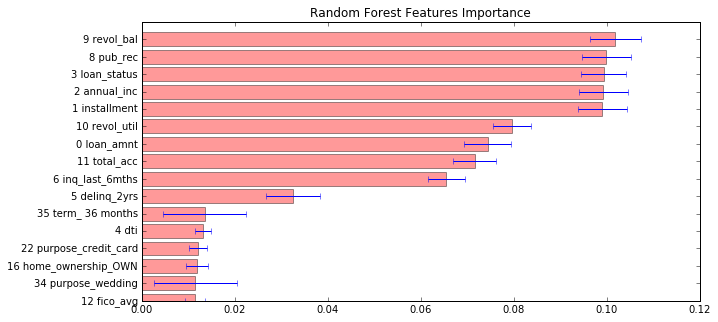

In [31]:
plt.figure(figsize=(10,5))
plt.title("Random Forest Features Importance")
plt.barh(range1, importance[indices], color = "r", xerr = std[indices], alpha = 0.4, align = "center")
plt.yticks(range1, feature_names[indices])
plt.ylim([20, len(importance)],)
plt.xlim([0.0, 0.12])
plt.show()

# Partial Dependence graphs

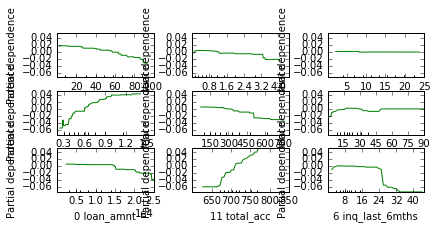

In [32]:
### from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
GBM = GradientBoostingRegressor(n_estimators=100, random_state=1)
GBM.fit(X,y)
feat = [9,8,3,2,1,10,0,11,6]
fig, axis = plot_partial_dependence(GBM,X,feat,feature_names = feature_names,grid_resolution=200)
plt.figure(figsize=(10,5))
plt.show()

In [33]:
# lets use only top 4 features
data.columns

Index(['loan_amnt', 'installment', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'fico_avg', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months'],
      dtype='object')

In [34]:
cols = ['revol_bal', 'pub_rec', 'annual_inc' , 'installment', 'revol_util', 'loan_amnt']
X = data[cols]
y = data["loan_status"]

In [35]:
penalty = {
    0 : "10",
    1 : "1"
}
# logistic regression
log_reg = LogisticRegression(class_weight= "balanced", penalty="l1")
log_reg.fit(X, y)
y_pred = cross_val_predict(log_reg, X, y, cv = 5)
compute_metric(y_pred)

true_positive 20417
true_negative 3245
false_positive 2389
false_negative 13126
true_positive_rate 60.86813940315417
false_positve_rate 42.403265885694005


,False Positive Rate,G-mean,accuracy,precision,sensitivity,specificity
values,42.40,59.21,60.40,89.52,60.87,57.60


In [36]:
# Lets use Random Forest classifer
penalty = { 0: "10",
            1: "1"}

Rf = RandomForestClassifier(class_weight= penalty)
Rf.fit(X,y)
y_pred = cross_val_predict(Rf, X, y, cv = 5)
compute_metric(y_pred)

true_positive 32506
true_negative 329
false_positive 5305
false_negative 1037
true_positive_rate 96.90844587544346
false_positve_rate 94.16045438409655


,False Positive Rate,G-mean,accuracy,precision,sensitivity,specificity
values,94.16,23.79,83.81,85.97,96.91,5.84


In [37]:
X = data[["fico_avg"]]
y = data["loan_status"]

In [38]:
penalty = { 0: "12",
            1: "1"}

log_reg = LogisticRegression(class_weight= penalty, C=10)
log_reg.fit(X, y)
y_pred = cross_val_predict(log_reg, X, y, cv = 5)
compute_metric(y_pred)

true_positive 2678
true_negative 5465
false_positive 169
false_negative 30865
true_positive_rate 7.983782011149867
false_positve_rate 2.9996450124245655


,False Positive Rate,G-mean,accuracy,precision,sensitivity,specificity
values,3.00,27.83,20.79,94.06,7.98,97.00


In [39]:
final = pd.read_csv("final")
final.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,n,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [40]:
# Final 

In [41]:
final = final[(final["loan_status"] == "Fully Paid") | (final["loan_status"] == "Charged Off")]

In [42]:
final["loan_status"] = final.loan_status.str.contains("Fully Paid").astype(int)

In [43]:
final.loan_status.value_counts()

1    33586
0     5653
Name: loan_status, dtype: int64

In [44]:
feat = ["last_fico_range_high", "annual_inc","total_acc", "loan_amnt",]
X = final[feat]
y = final["loan_status"]
print(X.shape)
print(y.shape)

(39239, 4)
(39239,)


In [45]:
from sklearn.cross_validation import KFold
kf = KFold(X.shape[0], random_state =1)
kf

sklearn.cross_validation.KFold(n=39239, n_folds=3, shuffle=False, random_state=1)

In [51]:
penalty = { 0: "12",
            1: "1"}

log_reg = LogisticRegression(class_weight=penalty, C=10.0, penalty="l1")
log_reg.fit(X, y)
y_pred = cross_val_predict(log_reg, X, y, cv = kf)
compute_metric(y_pred)

true_positive 21569
true_negative 2409
false_positive 3225
false_negative 11974
true_positive_rate 64.30253704200578
false_positve_rate 57.24174653887114


,False Positive Rate,G-mean,accuracy,precision,sensitivity,specificity
values,57.24,52.44,61.20,86.99,64.30,42.76
